##### Why and what is [Jupyter](http://jupyter.org/)? easy to explore from the notebook and easy to share and visualize. Can be used with R, Julia, Python

[Getting raw data](#raw)

[Communicating with Apis](#apis)

[Machine Learning](#ml)

# Data-mining and Introduction to Machine Learning using Python
***

In [2]:
from IPython.display import Image
from IPython.core.display import HTML 
import matplotlib.pyplot as plt
import numpy as np

## plotting style
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 16, 9
%matplotlib inline

Data-mining, data-crunching, data-munging, data-wrangling. 

It all involves certain activities like data cleaning, data transformation, data preparation, data visualization.

But it all starts with getting ***RAW DATA***

<a id="raw"> </a>
# Getting raw data

#### To first to some validating and analysis of data, we need to get the raw data

### A http request

In [1]:
import requests

response = requests.get("http://www.blocket.se/stockholm?q=macbook air").text

sample_item = response.find("item_row")
sample_html_text = response[sample_item:sample_item+20]

print(sample_html_text)

item_row item_row_fi


### Our research for buying a new computer

#### Here we parse the html to a format which we can use

In [1]:
import lxml.html

page = lxml.html.parse("http://www.blocket.se/stockholm?q=macbook")
# This is probably illegal. Do not use for reselling or redistributing. Do not sue me blocket!
items_data = []
for el in page.getroot().find_class("media item_row ptm pbm nmt"):
    links = el.find_class("item_link")
    images = el.find_class("item_image")
    prices = el.find_class("list_price")
    if links and images and prices and prices[0].text:
        items_data.append({"name": links[0].text,
                           "image": images[0].attrib['src'],
                           "price": int(prices[0].text.split(":")[0].replace(" ", ""))})
print(len(items_data))
items_data

7


[{'image': 'https://cdn.blocket.com/static/0/lithumbs/89/8907327299.jpg',
  'name': 'Apple Macbook Pro 15" Retina Display',
  'price': 19000},
 {'image': 'https://cdn.blocket.com/static/1/lithumbs/26/2658944814.jpg',
  'name': 'MacBook 5,1 - 13" silver',
  'price': 3000},
 {'image': 'https://cdn.blocket.com/static/1/lithumbs/26/2664216989.jpg',
  'name': 'MacBook Air (13 tum, tidigt 2015)',
  'price': 9000},
 {'image': 'https://cdn.blocket.com/static/2/lithumbs/99/9918785355.jpg',
  'name': 'MacBook 13.3" , 2st laddare ,Microsoft Office',
  'price': 5700},
 {'image': 'https://cdn.blocket.com/static/0/lithumbs/21/2118904966.jpg',
  'name': 'Macbook Pro 13.3 i bra skick',
  'price': 2500},
 {'image': 'https://cdn.blocket.com/static/1/lithumbs/20/2061849684.jpg',
  'name': 'Macbook Air 13 Helt ny oanvänd',
  'price': 7000},
 {'image': 'https://cdn.blocket.com/static/2/lithumbs/20/2034462877.jpg',
  'name': 'Macbook Air 13.3 (i5,4GB,128SSD 2014)',
  'price': 5000}]

In [2]:
prices = []
prices_for_retina = []
for item in items_data:
    prices.append(item['price'])
    if 'Retina' in item['name']:
        prices_for_retina.append(item['price'])    

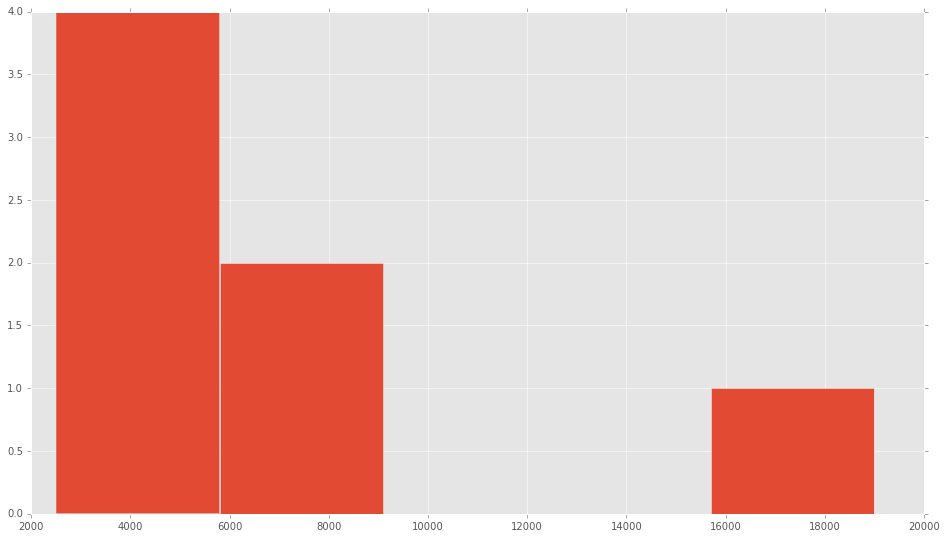

In [5]:
plt.hist(prices, 5, histtype='bar')
plt.hist(prices_for_retina, 2, histtype='bar',color='blue')
plt.show()

## Investigate if the salse of Airbook was better in New York than in Stockholm

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('../data/raw/sample2.csv')

df.head()

,Office,Year,Sales
0,Stockholm,2004,200
1,Stockholm,2005,250
2,Stockholm,2006,255
3,Stockholm,2007,260
4,Stockholm,2008,264


In [5]:
# This table has 3 columns: Office, Year, Sales
df.columns

# It's really easy to query data with Pandas:
df[(df['Office'] == 'Stockholm') & (df['Sales'] > 260)]

,Office,Year,Sales
4,Stockholm,2008,264
5,Stockholm,2009,274
6,Stockholm,2010,330
7,Stockholm,2011,364


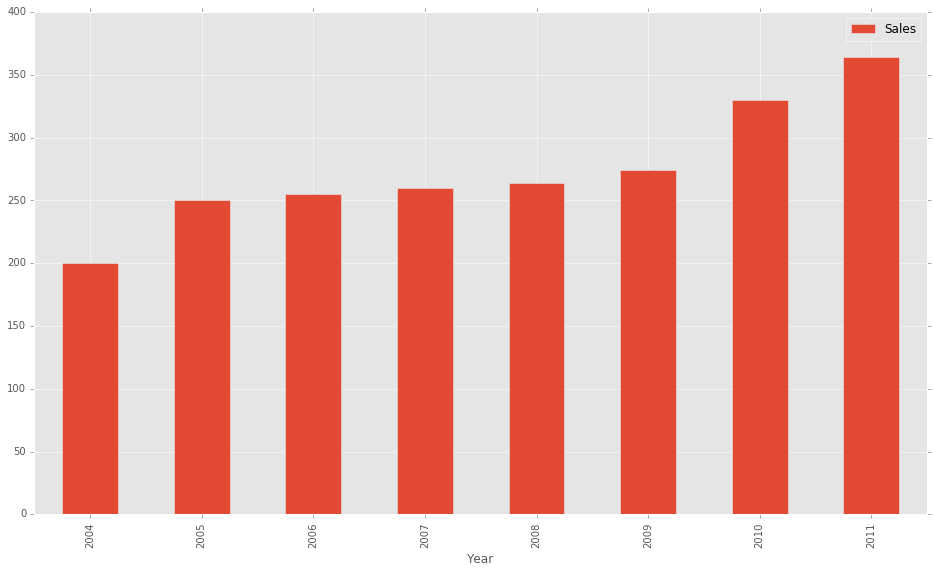

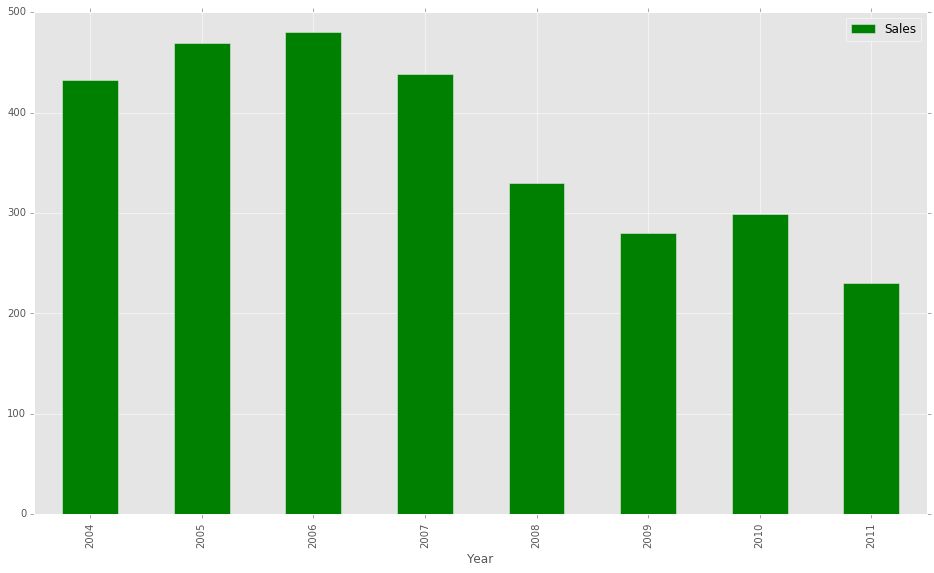

In [8]:
# It's also easy to do aggregations...
aggregated_stockholm_sales = df[df.Office == 'Stockholm'].groupby('Year').sum()
aggregated_stockholm_sales

aggregated_ny_sales = df[df.Office == 'New York'].groupby('Year').sum()
# ... and generate plots
aggregated_stockholm_sales.plot(kind='bar')
aggregated_ny_sales.plot(kind='bar', color='g')

<a id="apis"></a>
# Communicating with APIs

In [9]:
import requests

response = requests.get("https://www.googleapis.com/books/v1/volumes", params={"q":"machine learning"})
raw_data = response.json()
titles = [item['volumeInfo']['title'] for item in raw_data['items']]
titles

['Bayesian Reasoning and Machine Learning',
 'The Computational Complexity of Machine Learning',
 'Elements of Machine Learning',
 'Machine Learning',
 'Machine Learning',
 'Principles and Theory for Data Mining and Machine Learning',
 'Machine Learning in Non-stationary Environments',
 'Data Mining: Practical Machine Learning Tools and Techniques',
 'Machine Learning Proceedings 1991',
 'Machine Learning']

***
#### Apis - [reddit comments on apis](https://www.reddit.com/r/webdev/comments/3wrswc/what_are_some_fun_apis_to_play_with/)
* Riot Games
* [import.io](https://www.import.io/) - turns HTML pages to JSON
* Spotify
* Telegram
* SoundCloud
* Reddit
* YouTube
* Wunderground - Weather
* Kandy - Massaging and video calling
* Star Wars - All aboard the hype train
* Marvel Comics
* Mashape - API Market
* [FoaaS](http://www.foaas.com/) - Fuck off as a Service
* BreweryDB - Beer, beer, beer
* Slack
* Geo Names - Names of places
* Common Crawl - Lots of data, petabytes of it
* Programmers API - TV Show Info
* FitBit - FitBit fitness tracker
* JawBone - Jawbone fitness tracker
* Moneypot - BitCoin Gambling
* Steam - PCMR incoming
* Twilio - VoiP & Text Messaging
* Firebase - Build your own API
* IBM Watson - Cognitive Computing with IBM
* Lob - Email Postcards
* Algolia - Search as a Service
* Battle.net - Blizzard
* Free Geo IP - Get geolocation of IP
* The Counted - officer-involved killings in the US
* Wolfram Alpha
* IFTTT
* USDA National Nutrient Database - United States Department of Agriculture
* Twitter
* Nutritionix - Nutrition DB
* Geode Systems - lotsa data
* Programmable Web API's - /thread (though keep going, this is fun)
* Pokémon API
* Open Weather Map - yet more weather

#### Download some stock data using the api from [Quandl](https://www.quandl.com/)

In [10]:
import pandas as pd
import sys
sys.path.append('/usr/local/lib/python3.5/site-packages/quandl/')
import quandl

df = quandl.get('WIKI/GOOGL')

In [11]:
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.00,104.06,95.96,100.34,44659000.0,0.0,1.0,50.000,52.03,47.980,50.170,44659000.0
2004-08-20,101.01,109.08,100.50,108.31,22834300.0,0.0,1.0,50.505,54.54,50.250,54.155,22834300.0
2004-08-23,110.75,113.48,109.05,109.40,18256100.0,0.0,1.0,55.375,56.74,54.525,54.700,18256100.0
2004-08-24,111.24,111.60,103.57,104.87,15247300.0,0.0,1.0,55.620,55.80,51.785,52.435,15247300.0
2004-08-25,104.96,108.00,103.88,106.00,9188600.0,0.0,1.0,52.480,54.00,51.940,53.000,9188600.0


### Taking out "relevant" features, we want to at least make the data as easy as possible without losing information

In [12]:

# We do not need any of the other columns 
# since these will have the same information only in a nicer format
df = df[['Adj. Open',  'Adj. High',  'Adj. Low',  'Adj. Close', 'Adj. Volume']]

# high - low percentage per day
df['highlow_percentage'] = (df['Adj. High'] - df['Adj. Low']) / df['Adj. Close'] * 100.0

# percentage change per day
df['percentage_change'] = (df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open'] * 100.0

In [13]:
df = df[['Adj. Close', 'highlow_percentage', 'percentage_change', 'Adj. Volume']]
df.head()

,Adj. Close,highlow_percentage,percentage_change,Adj. Volume
Date,,,,
2004-08-19,50.170,8.072553,0.340000,44659000.0
2004-08-20,54.155,7.921706,7.227007,22834300.0
2004-08-23,54.700,4.049360,-1.218962,18256100.0
2004-08-24,52.435,7.657099,-5.726357,15247300.0
2004-08-25,53.000,3.886792,0.990854,9188600.0


<a id="#ml"> </a>
# Machine Learning

Subfield of artificial intelligence. 

***Learning from examples and experience***

* AlphaGo competing in the game Go

* Similar approach is used in learning to play Mario [MarIO](https://www.youtube.com/watch?v=qv6UVOQ0F44)
 * A great video for an introduction on neural networks
 
***What is Machine Learning?***

How would start by identifying a fruit

Difference between orange and an apple
```python
def define_fruit():
    # lots of code

def detect_colors(image):
    #lots of code

def analyze_shapes(image):
    # more code

def guess_texture(image):
    # code.............

if( fruit_is_apple() ):
    then
        # 15% success
        probablity_that_apple_ad_will_work = 0.15 

else if( fruit_is_orange()):
    then
        # 25% success
        probablity_that_orange_AD_will_work = 0.25 
```
Or how would you define characteristics for an individual. Some models are just rule based

```python
def invididual()
    if (individual_is_in_high_school) && if(graduates_within_three_years):
    
    then:
        # success of 10 %
        probablity_for_click_on_AD = 0.10
        showTheApproriateAd()
    
    else
        # success of 17 %
        probablity_for_click_on_AD = 0.17
        showAnotherAd()
```

Machine Learning Problems can be seperated into a few large categories:

* ***supervised learning***, which data comes from additional attributes that we can predict. Can be either:
 * ***classification***, discrete output variables
 * ***regression***, continuous output variables
* ***unsupervised learning***, which training data consist of input without any target values.

## Supervised Learning
Labels are already in place

![](supervised_learning_model.jpg "logo")

We want to classify orange from apple

Weight | Texture | Label
--- | --- | ---
150 | Bumpy | Orange
170 | Bumpy | Orange
140 | Soft | Apple
130 | Soft | Apple
... | ... | ...

In [14]:
# input to the classifier
features = [[140, 'soft'], [130,'soft'], [150,'bumpy'],[170,'bumpy']]

# output for the classifier
labels = ['apple', 'apple','orange','orange']

# We need to change the type of input for the classifier so we rename the features into ints

# 1 = 'soft', 0 = 'bumpy'
features = [[140, 1], [130,1], [150,0],[170,0]]

# 0 = 'apple', 1 = 'orange'
labels = [0,0,1,1]

### Now that we have the data let's make something from it

In [15]:
from sklearn import tree

# doesnt know anything yet
clf = tree.DecisionTreeClassifier()

Now we will train the data to the classifier with the training data that we have

In [16]:
clf = clf.fit(features,labels)

*** Notice that we want to predict something that is not in the training data ***

In [17]:
clf.predict([[160,0]])

array([1])

# Classic Machine Learning Problem

## [Iris flower data set](https://en.wikipedia.org/wiki/Iris_flower_data_set)

Classify the type of flower based on 
* width
* length
* petal width 
* petal length

scikit comes with some practices [datasets](http://scikit-learn.org/stable/datasets/)

In [18]:
from sklearn.datasets import load_iris
iris = load_iris()

print(iris.feature_names)
print(iris.target_names)
print(iris.data[0])
print(iris.target[0])

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
[ 5.1  3.5  1.4  0.2]
0


# Preparing Data
Examples used to "test" the classifiers accurracy.

will ***NOT*** be part of the training data

Usually a standard is to have ***80% training*** and ***20% testing***. But by no means a goto from the start

### Testing data

In [19]:
# dataset is constructed in a great way
# so we can get testing data from each example by taking 0,50,100

test_index = [0,50,100]

### Training data

In [20]:
# built based on c computation and mutation of arrays, i.e. its pretty fast
import numpy as np

# training data
train_target = np.delete(iris.target, test_index)
train_data = np.delete(iris.data, test_index, axis=0)

# testing data
test_target = iris.target[test_index]
test_data = iris.data[test_index]

## Training classifier

In [21]:
clf = tree.DecisionTreeClassifier()
clf.fit(train_data, train_target)

# We expect the classifier to give us [0,1,2] from test_target
print(test_target)

print(clf.predict(test_data))

[0 1 2]
[0 1 2]


# DONE! we have now made our first machine learning

### Classification
* Naive Bayes
* Decision trees / Random Forest
* SVM
* KNN
* ... many more!

Recall the features that we have, we need to evaluate them carefully.


next we will visualize the decision tree to go into more in depth of what actually happens

Code is taken from scikits homepage on [decision tree visualization](http://scikit-learn.org/stable/modules/tree.html)

## Visualize the Decision Tree Classifier

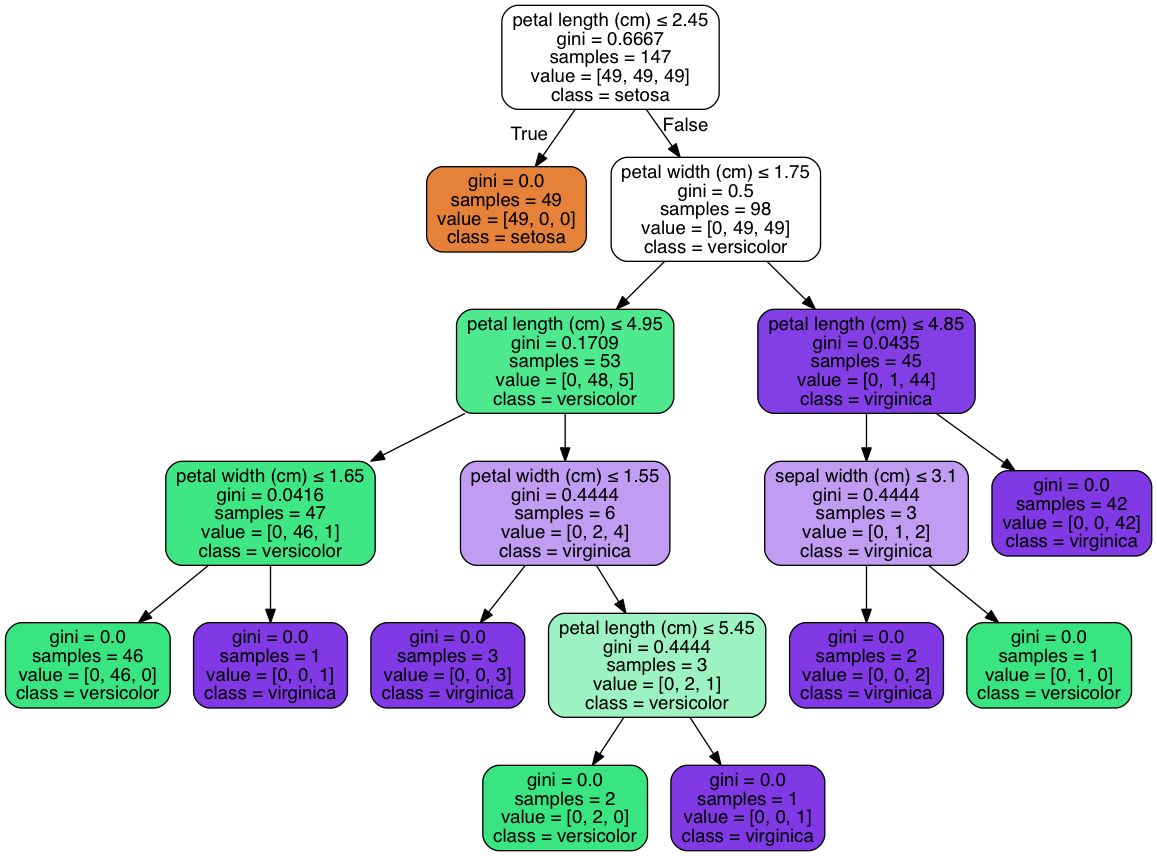

In [22]:
import sys
sys.path.append('/usr/local/lib/python3.5/site-packages/pydot/')

import pydotplus
from sklearn.externals.six import StringIO
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
graph.write_pdf("iris.pdf")
Image(graph.create_png()) 

In [23]:
# first testing flower
print(test_data[0], test_target[0])

print(iris.feature_names)
print("targets: ",iris.target_names)

[ 5.1  3.5  1.4  0.2] 0
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
targets:  ['setosa' 'versicolor' 'virginica']


In [25]:
# second testing flower
print(test_data[1], test_target[1])

[ 7.   3.2  4.7  1.4] 1





# Parting words!

### *Choosing good features is one of your most important jobs*

cause the ML-models are dumb....

### *No free hunch*

* be skeptic and try to find loopholes with the data
* Models get a score function and can be cross-validated but the is for another time


# Hope it was fun everyone! Please give feedback on what can be improved!